In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data

In [14]:
df_covid_tweets = pd.read_csv('covid_tweets_sentiment.csv')
df_covid_tweets_sent = df_covid_tweets.copy()
print(df_covid_tweets_sent.count())

df_covid_tweets_sent = df_covid_tweets_sent.drop(['tweet'], axis='columns')
df_covid_tweets_sent['created at']=pd.to_datetime(df_covid_tweets_sent['created at'], utc= True).dt.date

parties = df_covid_tweets_sent['party'].unique()

df_non_covid_tweets = pd.read_csv('non_covid_tweets_sentiment.csv')
df_non_covid_tweets_sent = df_non_covid_tweets.copy()
print(df_non_covid_tweets_sent.count())
df_non_covid_tweets_sent = df_non_covid_tweets_sent.drop(['tweet'], axis='columns')
df_non_covid_tweets_sent['created at']=pd.to_datetime(df_non_covid_tweets_sent['created at'], utc= True).dt.date

pd.set_option('display.max_rows', None)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

name          44312
party         44312
created at    44312
tweet         44312
polarity      44312
dtype: int64
name          210511
party         210511
created at    210511
tweet         210511
polarity      210511
dtype: int64


party
AfD                      5112
Bündnis 90/Die Grünen    6906
CDU                      7141
CSU                      1021
Die Linke                7332
FDP                      7975
Fraktionslos              699
SPD                      8126
dtype: int64
sentiment  party                
negative   AfD                      24.432707
           Bündnis 90/Die Grünen    17.405155
           CDU                      16.090183
           CSU                      12.928501
           Die Linke                25.122750
           FDP                      20.037618
           Fraktionslos             19.885551
           SPD                      16.945607
neutral    AfD                      44.953052
           Bündnis 90/Die Grünen    42.426875
           CDU                      40.344490
           CSU                      38.491675
           Die Linke                39.484452
           FDP                      40.865204
           Fraktionslos             45.350501
           SPD    

<ipython-input-15-330a4edbbf26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral['sentiment'] = 'neutral'
<ipython-input-15-330a4edbbf26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos['sentiment'] = 'positive'
<ipython-input-15-330a4edbbf26>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

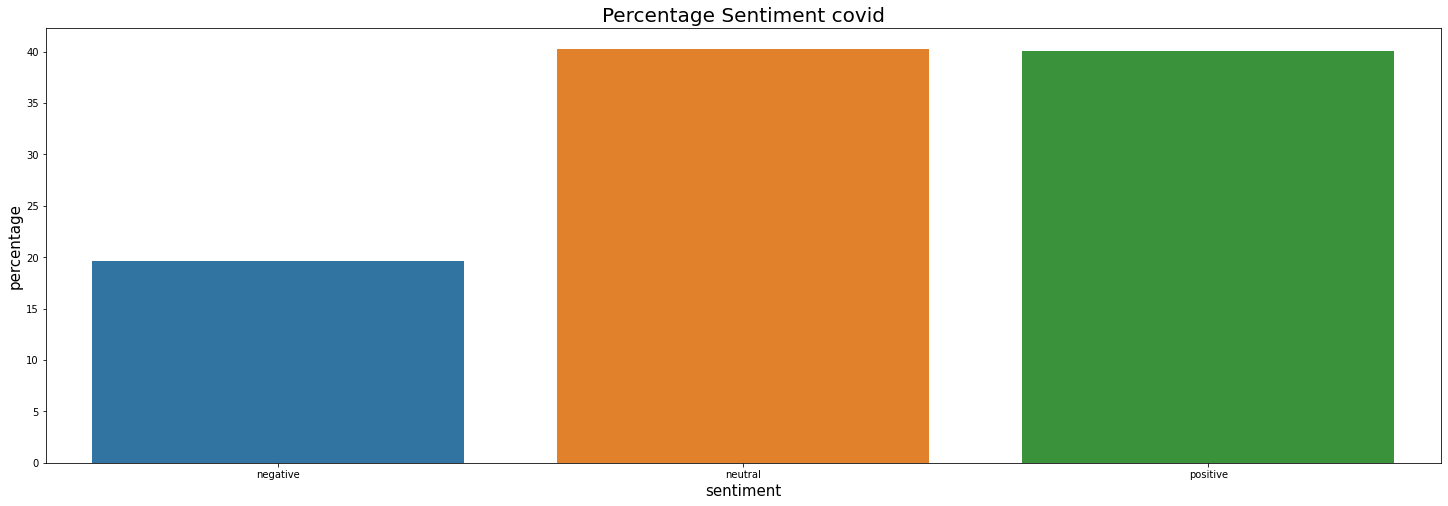

In [15]:
covid_tweets_overview = df_covid_tweets_sent.copy()

covid_tweets_neutral = covid_tweets_overview[covid_tweets_overview['polarity'] == 0.0]
covid_tweets_neutral['sentiment'] = 'neutral'
covid_tweets_pos = covid_tweets_overview[covid_tweets_overview['polarity'] > 0.0]
covid_tweets_pos['sentiment'] = 'positive'
covid_tweets_neg = covid_tweets_overview[covid_tweets_overview['polarity'] < 0.0]
covid_tweets_neg['sentiment'] = 'negative'

dfs = [covid_tweets_neutral, covid_tweets_pos, covid_tweets_neg]
concat_dfs = pd.concat(dfs)
new_df = concat_dfs.copy()
new_df = new_df.drop(['name', 'created at', 'polarity'], axis='columns')
#for row in new_df.itertuples(index=False):
#  print(row)
print(new_df.groupby(['party']).size())
group1 = ((new_df.groupby(['sentiment', 'party']).size())/new_df.groupby(['party']).size())*100
print(group1)
group = new_df.groupby(['sentiment', 'party']).size()
print(group)

group_sentiment = concat_dfs.drop(['name', 'party', 'created at'], axis='columns')
group_sentiment = group_sentiment.groupby('sentiment').count()
group_sentiment = group_sentiment.rename(columns={'polarity': 'count'})
group_sentiment['percentage'] = ((group_sentiment['count'] / group_sentiment['count'].sum()) *100).round(1)

group_sentiment.reset_index(inplace=True)
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='sentiment',
                    y='percentage',)
chart.set_title("Percentage Sentiment covid", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("percentage", fontsize = 15)
plt.show()

<ipython-input-24-f109c38692fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_tweets_neutral['sentiment'] = 'neutral'
<ipython-input-24-f109c38692fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_covid_tweets_pos['sentiment'] = 'positive'
<ipython-input-24-f109c38692fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

party
AfD                      20343
Bündnis 90/Die Grünen    34770
CDU                      37097
CSU                       3929
Die Linke                32810
FDP                      36489
Fraktionslos              6727
SPD                      38346
dtype: int64
sentiment  party                
negative   AfD                      20.817972
           Bündnis 90/Die Grünen    14.598792
           CDU                      12.987573
           CSU                      10.409773
           Die Linke                19.478817
           FDP                      15.078517
           Fraktionslos             17.214211
           SPD                      11.896938
neutral    AfD                      49.643612
           Bündnis 90/Die Grünen    51.380500
           CDU                      51.332992
           CSU                      52.252482
           Die Linke                49.302042
           FDP                      51.231878
           Fraktionslos             52.623755
          

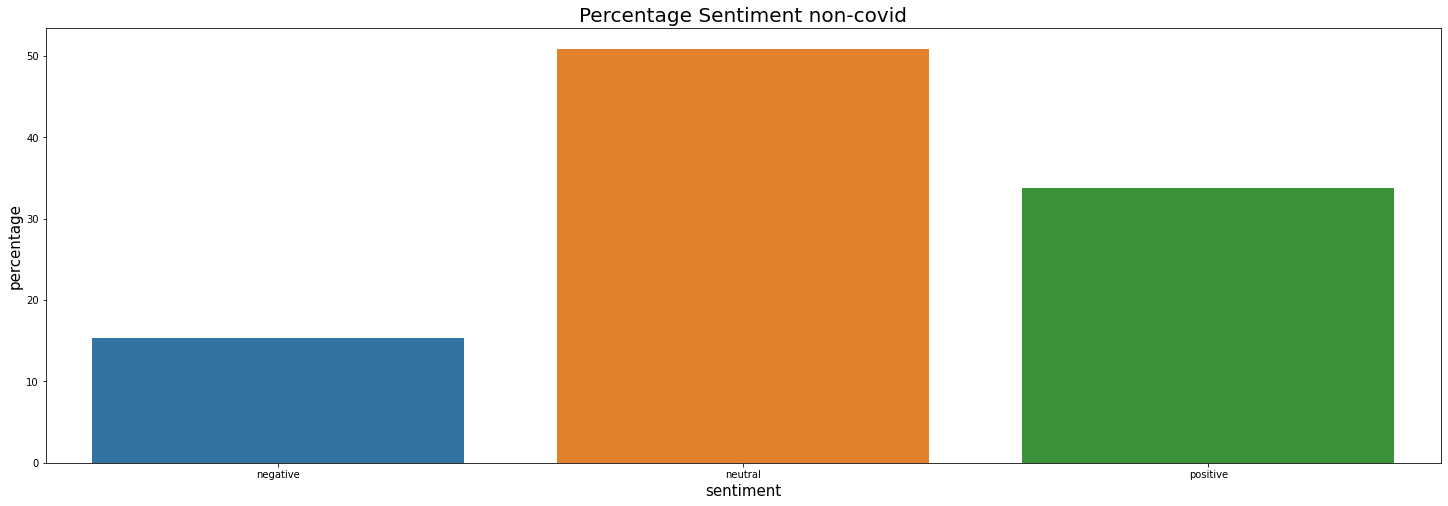

In [24]:
non_covid_tweets_overview = df_non_covid_tweets_sent.copy()

non_covid_tweets_neutral = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] == 0.0]
non_covid_tweets_neutral['sentiment'] = 'neutral'
non_covid_tweets_pos = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] > 0.0]
non_covid_tweets_pos['sentiment'] = 'positive'
non_covid_tweets_neg = non_covid_tweets_overview[non_covid_tweets_overview['polarity'] < 0.0]
non_covid_tweets_neg['sentiment'] = 'negative'

non_dfs = [non_covid_tweets_neutral, non_covid_tweets_pos, non_covid_tweets_neg]
non_concat_dfs = pd.concat(non_dfs)
new_df1 = non_concat_dfs.copy()
new_df1 = new_df1.drop(['name', 'created at', 'polarity'], axis='columns')
#for row in new_df.itertuples(index=False):
#  print(row)
print(new_df1.groupby(['party']).size())
group12 = ((new_df1.groupby(['sentiment', 'party']).size())/new_df1.groupby(['party']).size())*100
print(group12)
group2 = new_df1.groupby(['sentiment', 'party']).size()
print(group2)
non_group_sentiment = non_concat_dfs.drop(['name', 'party', 'created at'], axis='columns')
non_group_sentiment = non_group_sentiment.groupby('sentiment').count()
non_group_sentiment = non_group_sentiment.rename(columns={'polarity': 'count'})
non_group_sentiment['percentage'] = ((non_group_sentiment['count'] / non_group_sentiment['count'].sum()) *100).round(1)

non_group_sentiment.reset_index(inplace=True)
print(non_group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=non_group_sentiment,
                    x='sentiment',
                    y='percentage',)
chart.set_title("Percentage Sentiment non-covid", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("percentage", fontsize = 15)
plt.show()

                   party  polarity
0                    AfD  0.030203
1  Bündnis 90/Die Grünen  0.099543
2                    CDU  0.119662
3                    CSU  0.134994
4              Die Linke  0.042031
5                    FDP  0.082255
6           Fraktionslos  0.071350
7                    SPD  0.132380


<ipython-input-17-5f4b1fcf4ae6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral_per_party['sentiment'] = 'neutral'
<ipython-input-17-5f4b1fcf4ae6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-17-5f4b1fcf4ae6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

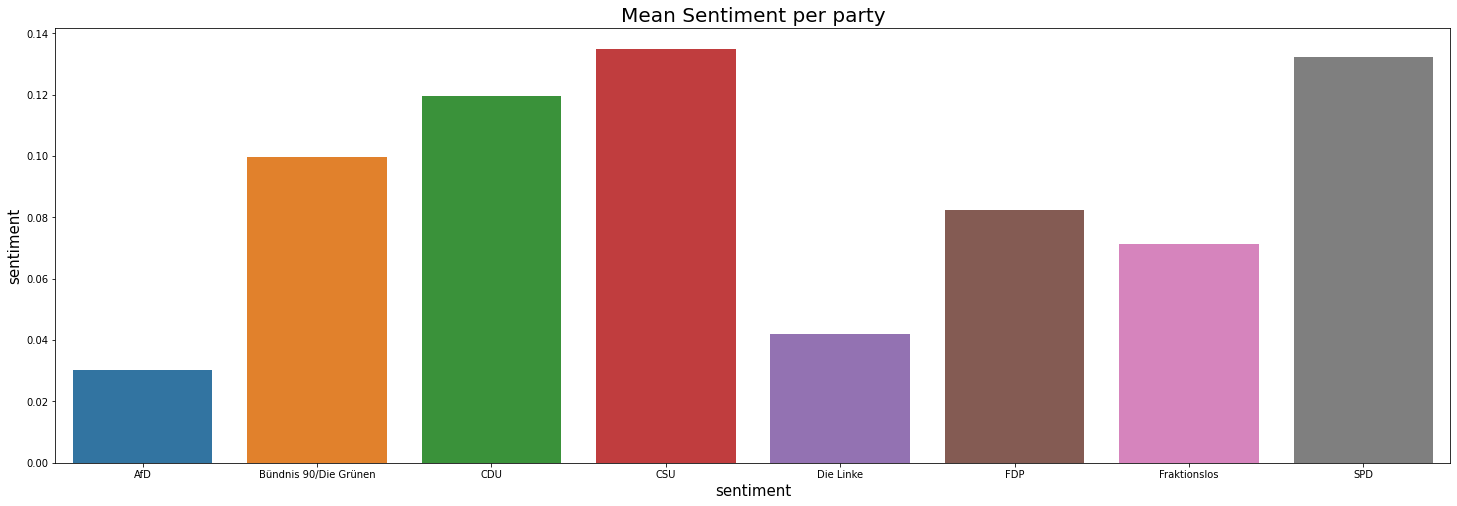

In [17]:
covid_tweets_per_party = df_covid_tweets_sent.copy()

covid_tweets_neutral_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] == 0.0]
covid_tweets_neutral_per_party['sentiment'] = 'neutral'
covid_tweets_pos_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] > 0.0]
covid_tweets_pos_per_party['sentiment'] = 'positive'
covid_tweets_neg_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] < 0.0]
covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [covid_tweets_neutral_per_party, covid_tweets_pos_per_party, covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')

group_sentiment = group_sentiment[['party', 'polarity']].groupby('party').mean()

group_sentiment.reset_index(inplace=True)
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='party',
                    y='polarity',)
chart.set_title("Mean Sentiment per party", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("sentiment", fontsize = 15)
plt.show()


<ipython-input-18-6ecff52ceb22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral_per_party['sentiment'] = 'neutral'
<ipython-input-18-6ecff52ceb22>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-18-6ecff52ceb22>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

                   party  polarity
0                    AfD  0.040615
1  Bündnis 90/Die Grünen  0.102099
2                    CDU  0.112161
3                    CSU  0.127776
4              Die Linke  0.055970
5                    FDP  0.089597
6           Fraktionslos  0.070178
7                    SPD  0.128887


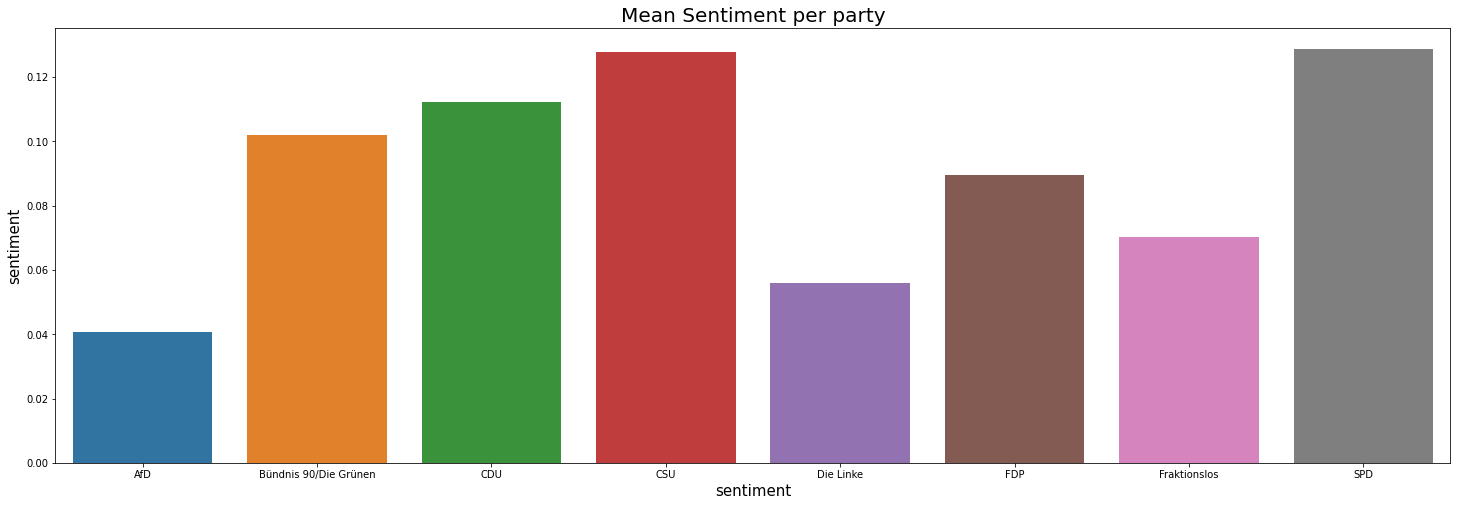

In [18]:
covid_tweets_per_party = df_non_covid_tweets_sent.copy()

covid_tweets_neutral_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] == 0.0]
covid_tweets_neutral_per_party['sentiment'] = 'neutral'
covid_tweets_pos_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] > 0.0]
covid_tweets_pos_per_party['sentiment'] = 'positive'
covid_tweets_neg_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] < 0.0]
covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [covid_tweets_neutral_per_party, covid_tweets_pos_per_party, covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')

group_sentiment = group_sentiment[['party', 'polarity']].groupby('party').mean()

group_sentiment.reset_index(inplace=True)
print(group_sentiment)
fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment,
                    x='party',
                    y='polarity',)
chart.set_title("Mean Sentiment per party", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("sentiment", fontsize = 15)
plt.show()

# Sentiment per Party (Boxplot with outliers)

<ipython-input-19-279263972d77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxplot_per_party['sentiment'] = 'neutral'
<ipython-input-19-279263972d77>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party['sentiment'] = 'positive'
<ipython-input-19-279263972d77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

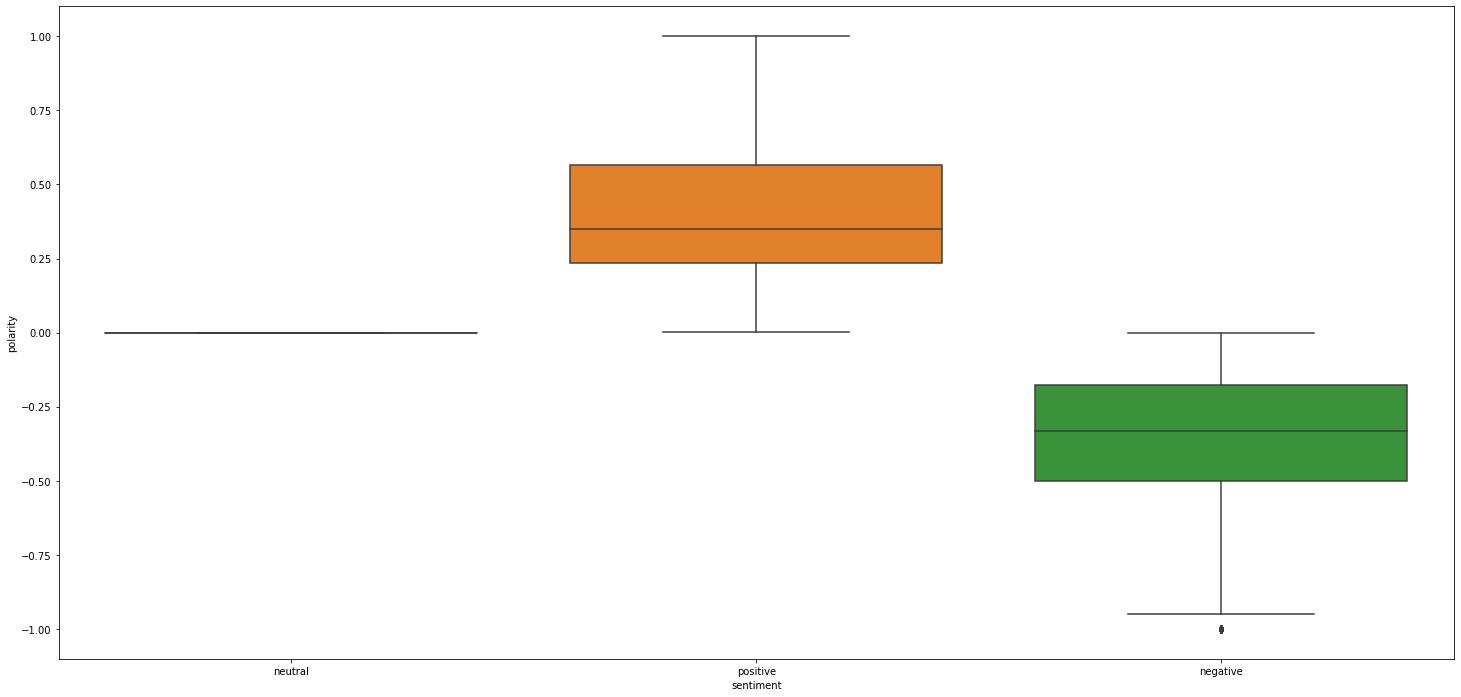

In [19]:

boxplot_per_party = df_covid_tweets_sent.copy()

boxplot_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] == 0.0]
boxplot_per_party['sentiment'] = 'neutral'
covid_tweets_pos_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] > 0.0]
covid_tweets_pos_per_party['sentiment'] = 'positive'
covid_tweets_neg_per_party = covid_tweets_per_party[covid_tweets_per_party['polarity'] < 0.0]
covid_tweets_neg_per_party['sentiment'] = 'negative'

dfs = [covid_tweets_neutral_per_party, covid_tweets_pos_per_party, covid_tweets_neg_per_party]
concat_dfs = pd.concat(dfs)

group_sentiment = concat_dfs.drop(['name','created at'], axis='columns')
print(group_sentiment)

plt.figure(figsize=(25, 12))
chart = sns.boxplot(data=group_sentiment,
                    x='sentiment',
                    y='polarity')
plt.show()

<ipython-input-20-e089ea9dfd5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_neutral_per_party_median['sentiment'] = 'neutral'
<ipython-input-20-e089ea9dfd5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_tweets_pos_per_party_median['sentiment'] = 'positive'
<ipython-input-20-e089ea9dfd5c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

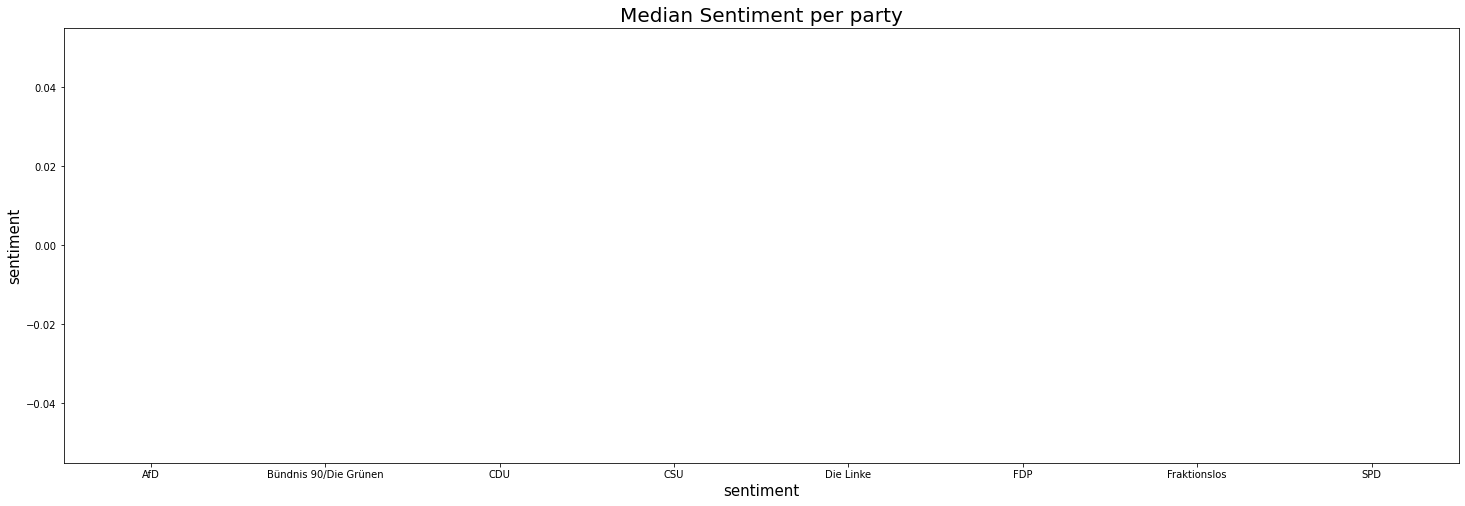

In [20]:


covid_tweets_per_party_median = df_covid_tweets_sent.copy()

covid_tweets_neutral_per_party_median = covid_tweets_per_party_median[covid_tweets_per_party_median['polarity'] == 0.0]
covid_tweets_neutral_per_party_median['sentiment'] = 'neutral'
covid_tweets_pos_per_party_median = covid_tweets_per_party_median[covid_tweets_per_party_median['polarity'] > 0.0]
covid_tweets_pos_per_party_median['sentiment'] = 'positive'
covid_tweets_neg_per_party_median = covid_tweets_per_party_median[covid_tweets_per_party_median['polarity'] < 0.0]
covid_tweets_neg_per_party_median['sentiment'] = 'negative'

dfs_per_party_median = [covid_tweets_neutral_per_party_median, covid_tweets_pos_per_party_median, covid_tweets_neg_per_party_median]
concat_dfs_per_party_median = pd.concat(dfs_per_party_median)
print(concat_dfs_per_party_median)

group_sentiment_per_party_median = concat_dfs_per_party_median.drop(['name','created at'], axis='columns')

group_sentiment_per_party_median = group_sentiment_per_party_median[['party', 'polarity', 'sentiment']].groupby('party').median()
group_sentiment_per_party_median.reset_index(inplace=True)
print(group_sentiment_per_party_median)

fig, ax = plt.subplots(figsize=(25,8))
chart = sns.barplot(data=group_sentiment_per_party_median,
                    x='party',
                    y='polarity',)
chart.set_title("Median Sentiment per party", fontsize = 20)
chart.set_xlabel("sentiment", fontsize = 15)
chart.set_ylabel("sentiment", fontsize = 15)
plt.show()

                     polarity
week_number_of_year          
1                    0.342857
2                    0.012963
3                    0.020000
4                    0.045614
5                    0.011318
6                    0.115872
7                    0.120228
8                   -0.029624
9                    0.079984
10                   0.076674
11                   0.103796
12                   0.125075
13                   0.110707
14                   0.105041
15                   0.099615
16                   0.088101
17                   0.090630
18                   0.110714
19                   0.078906
20                   0.088228
21                   0.089929
22                   0.062867
23                   0.080292
24                   0.118219
25                   0.082134
26                   0.073510
27                   0.096815
28                   0.077754
29                   0.101231
30                   0.075782
31                   0.042002
32        

<ipython-input-21-023145922818>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid_tweets_year['week_number_of_year'] = covid_tweets_year['created at'].dt.week


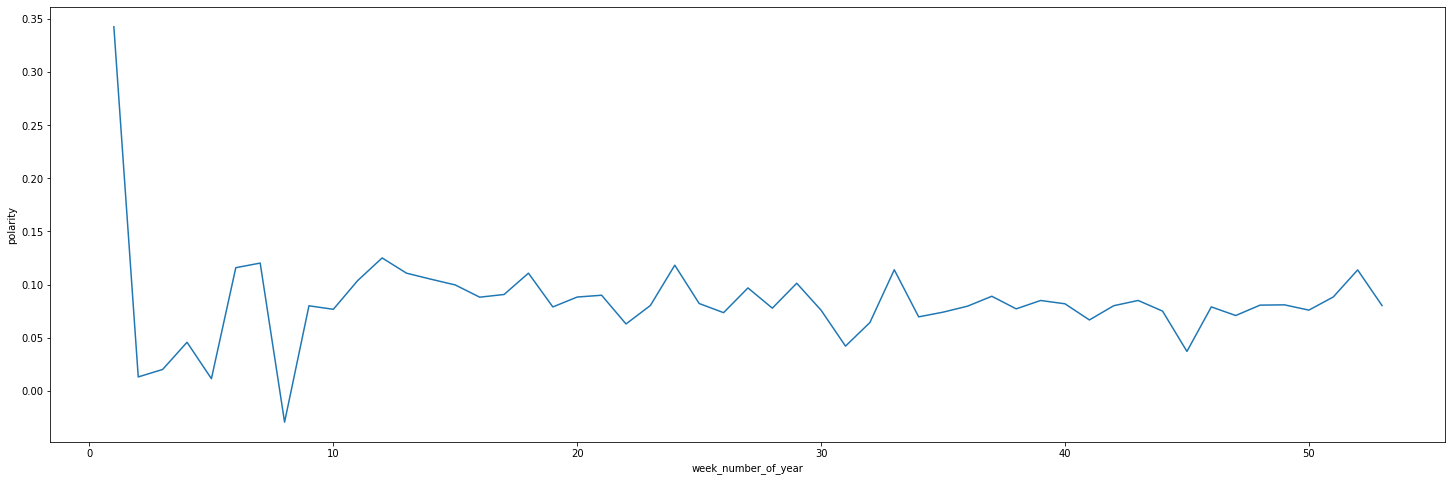

In [21]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)


covid_tweets_year = df_covid_tweets_sent.copy()
#print(covid_tweets_year)
covid_tweets_year  = covid_tweets_year.drop(['name'], axis='columns')
covid_tweets_year = covid_tweets_year.loc[(covid_tweets_year['created at'] >= start_date) & (covid_tweets_year['created at'] <= end_date)]
#print(covid_tweets_year)

covid_tweets_year['created at'] = pd.to_datetime(covid_tweets_year['created at'])
covid_tweets_year['week_number_of_year'] = covid_tweets_year['created at'].dt.week
covid_tweets_year = covid_tweets_year.pivot_table(index=['week_number_of_year'], aggfunc='mean')
print(covid_tweets_year)
print(covid_tweets_year['polarity'].mean())
print(covid_tweets_year['polarity'].max())
print(covid_tweets_year['polarity'].min())
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=covid_tweets_year,)
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()


<ipython-input-22-c0d4de958bbf>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  non_covid_tweets_year['week_number_of_year'] = non_covid_tweets_year['created at'].dt.week


                     polarity
week_number_of_year          
1                    0.079335
2                    0.092116
3                    0.087040
4                    0.088949
5                    0.088999
6                    0.067119
7                    0.087829
8                    0.051098
9                    0.097792
10                   0.088782
11                   0.113393
12                   0.125475
13                   0.103633
14                   0.082362
15                   0.090200
16                   0.085693
17                   0.091973
18                   0.089092
19                   0.093895
20                   0.094752
21                   0.092431
22                   0.097172
23                   0.093144
24                   0.090008
25                   0.083011
26                   0.102007
27                   0.090075
28                   0.094113
29                   0.095290
30                   0.088137
31                   0.079859
32        

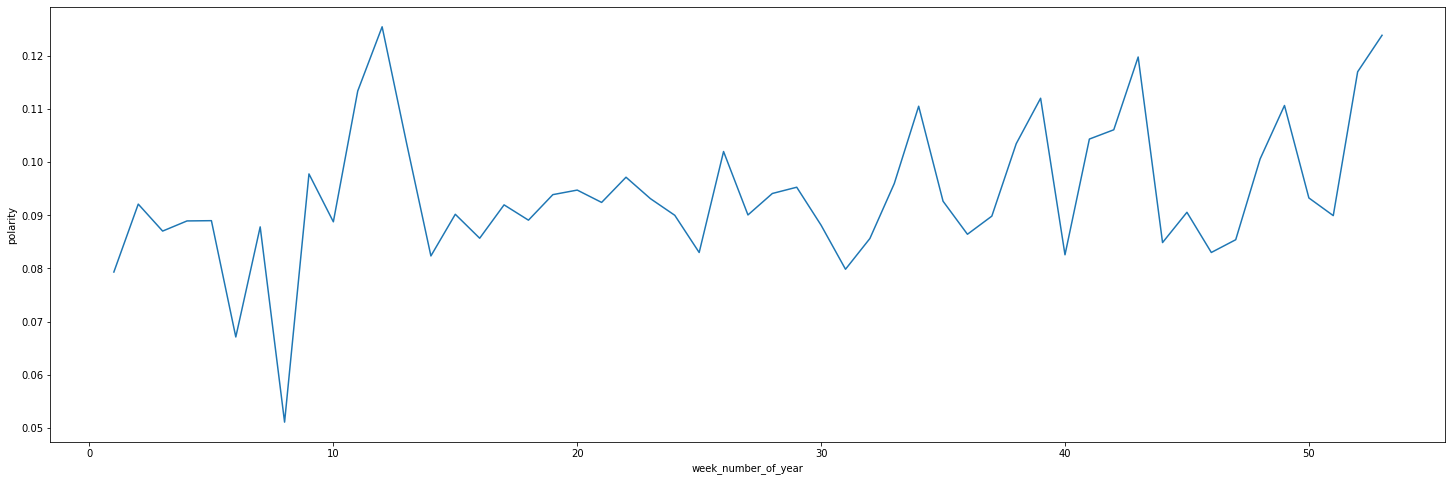

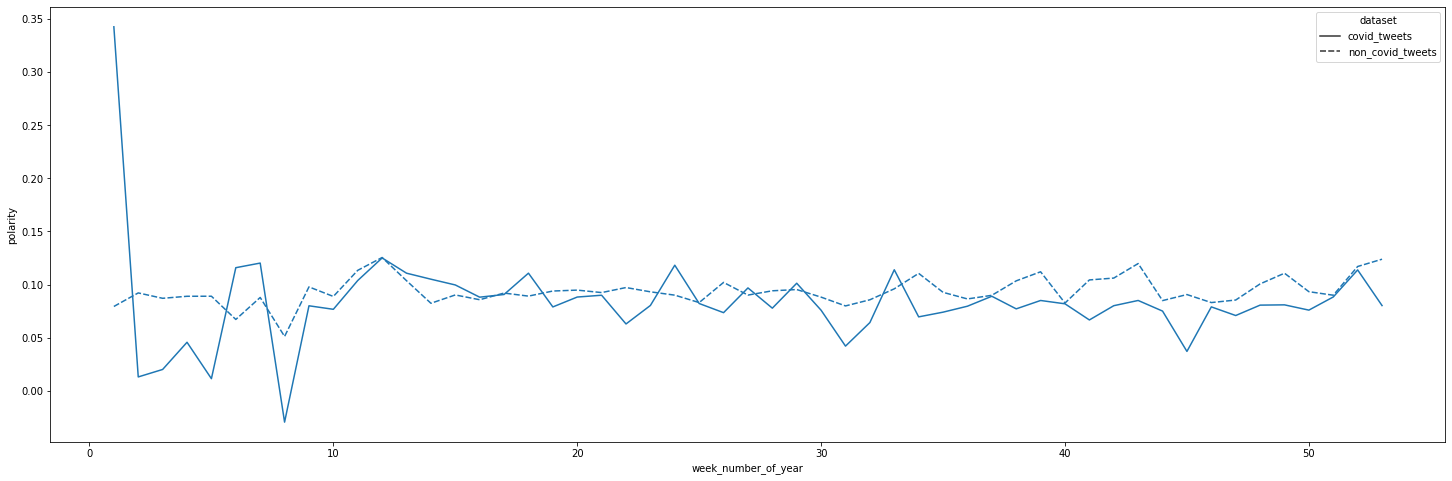

In [22]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)


non_covid_tweets_year = df_non_covid_tweets_sent.copy()
non_covid_tweets_year  = non_covid_tweets_year.drop(['name'], axis='columns')
non_covid_tweets_year = non_covid_tweets_year.loc[(non_covid_tweets_year['created at'] >= start_date) & (non_covid_tweets_year['created at'] <= end_date)]
#print(covid_tweets_year)

non_covid_tweets_year['created at'] = pd.to_datetime(non_covid_tweets_year['created at'])
non_covid_tweets_year['week_number_of_year'] = non_covid_tweets_year['created at'].dt.week
non_covid_tweets_year = non_covid_tweets_year.pivot_table(index=['week_number_of_year'], aggfunc='mean')
print(non_covid_tweets_year)

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=non_covid_tweets_year,)
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()


print(non_covid_tweets_year['polarity'].mean())
print(non_covid_tweets_year['polarity'].max())
print(non_covid_tweets_year['polarity'].min())
concatenated_sentiment_year = pd.concat([covid_tweets_year.assign(dataset='covid_tweets'), non_covid_tweets_year.assign(dataset='non_covid_tweets')])
print(concatenated_sentiment_year)
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=concatenated_sentiment_year,
                     style='dataset')
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()

<ipython-input-23-92f05af077f7>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  covid_tweets_party_year['week_number_of_year'] = covid_tweets_party_year['created at'].dt.week
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

<ipython-input-23-92f05af077f7>:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  non_covid_tweets_party_year['week_number_of_year'] = non_covid_tweets_party_year['created at'].dt.week


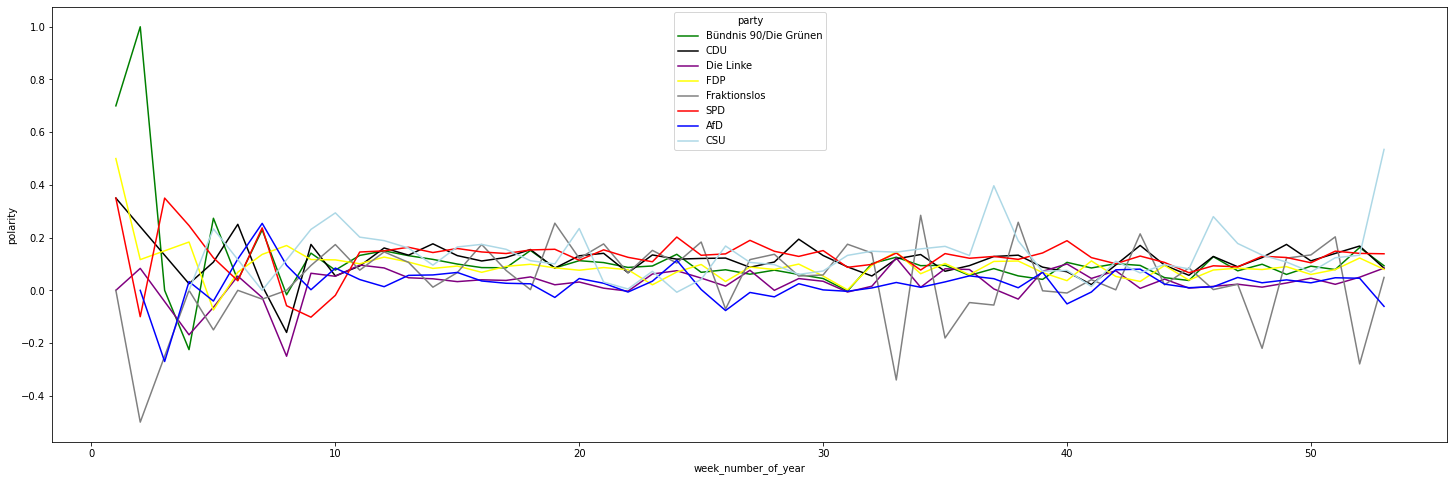

                                           polarity
week_number_of_year party                          
1                   AfD                    0.009125
                    Bündnis 90/Die Grünen  0.091001
                    CDU                    0.093934
                    CSU                    0.046196
                    Die Linke              0.027035
                    FDP                    0.144818
                    Fraktionslos           0.071680
                    SPD                    0.108134
2                   AfD                    0.035600
                    Bündnis 90/Die Grünen  0.100916
                    CDU                    0.087359
                    CSU                    0.168594
                    Die Linke              0.051816
                    FDP                    0.105103
                    Fraktionslos           0.045367
                    SPD                    0.145512
3                   AfD                    0.078852
            

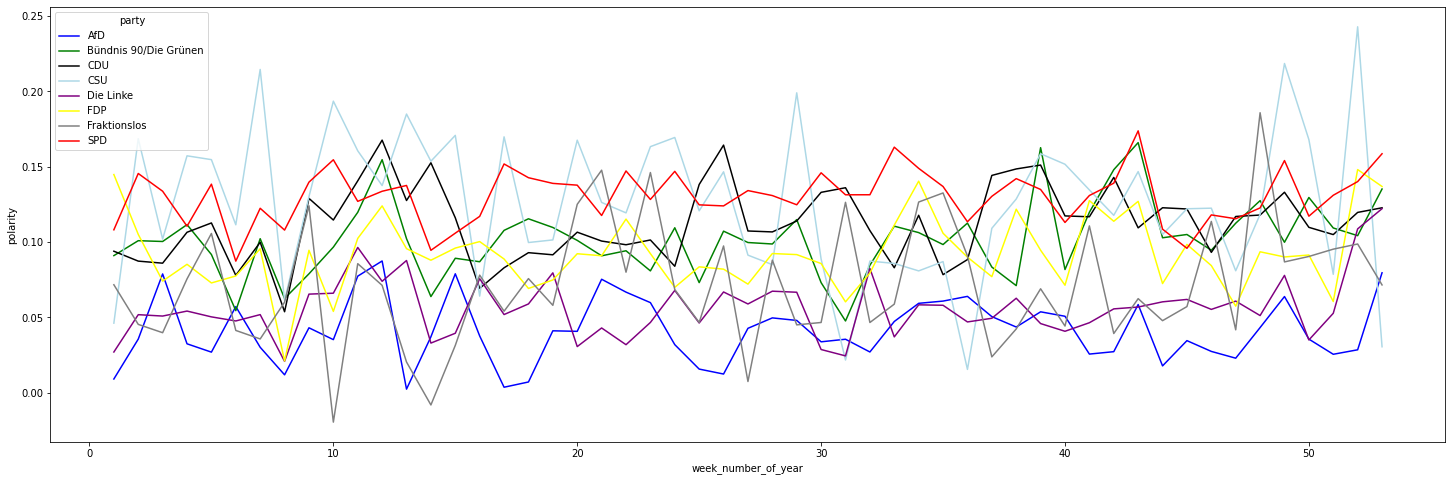

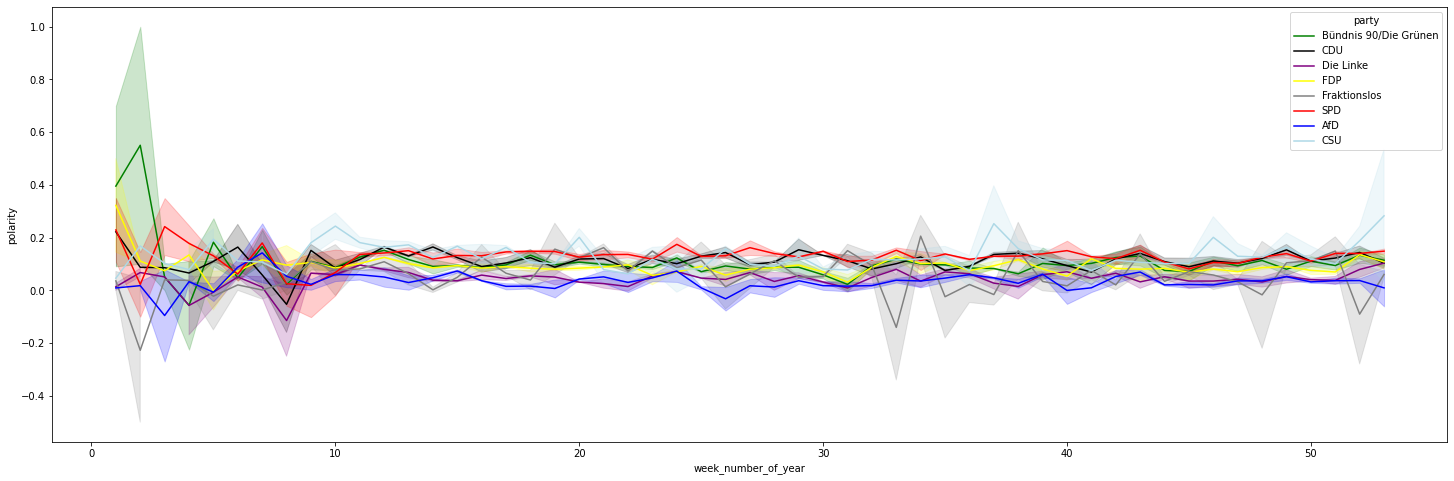

In [23]:
start_date = pd.to_datetime('01/1/2020', utc= True)
end_date = pd.to_datetime('12/31/2020', utc= True)

covid_tweets_party_year = df_covid_tweets_sent.copy()
covid_tweets_party_year  = covid_tweets_party_year.drop(['name'], axis='columns')
covid_tweets_party_year = covid_tweets_party_year.loc[(covid_tweets_party_year['created at'] >= start_date) & (covid_tweets_party_year['created at'] <= end_date)]

covid_tweets_party_year['created at'] = pd.to_datetime(covid_tweets_party_year['created at'])
covid_tweets_party_year['week_number_of_year'] = covid_tweets_party_year['created at'].dt.week
print(covid_tweets_party_year)
covid_tweets_party_year = covid_tweets_party_year.pivot_table(index=['week_number_of_year', 'party'], aggfunc='mean')

plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=covid_tweets_party_year,
                     hue='party',
                     palette=party_colors)
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()

non_covid_tweets_party_year = df_non_covid_tweets_sent.copy()
non_covid_tweets_party_year  = non_covid_tweets_party_year.drop(['name'], axis='columns')
non_covid_tweets_party_year = non_covid_tweets_party_year.loc[(non_covid_tweets_party_year['created at'] >= start_date) & (non_covid_tweets_party_year['created at'] <= end_date)]

non_covid_tweets_party_year['created at'] = pd.to_datetime(non_covid_tweets_party_year['created at'])
non_covid_tweets_party_year['week_number_of_year'] = non_covid_tweets_party_year['created at'].dt.week
non_covid_tweets_party_year = non_covid_tweets_party_year.pivot_table(index=['week_number_of_year', 'party'], aggfunc='mean')
print(non_covid_tweets_party_year)
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=non_covid_tweets_party_year,
                     hue='party',
                     palette=party_colors)
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()

concatenated_sentiment_party_year = pd.concat([covid_tweets_party_year.assign(dataset='covid_tweets'), non_covid_tweets_party_year.assign(dataset='non_covid_tweets')])
plt.figure(figsize=(25,8))
chart = sns.lineplot(x='week_number_of_year',
                     y='polarity',
                     data=concatenated_sentiment_party_year,
                     hue='party',
                     palette=party_colors)
#plt.title("Number of Covid-Tweets/ Non-Covid-Tweets throughout the year", fontsize = 20)
#plt.xlabel("month", fontsize = 15)
#plt.ylabel("number of tweets", fontsize = 15)
plt.show()